<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Testing-Auditory-Stimulation-Parameters" data-toc-modified-id="Testing-Auditory-Stimulation-Parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Testing Auditory Stimulation Parameters</a></span><ul class="toc-item"><li><span><a href="#Debugging-the-Auditory-Stimulation-Setup" data-toc-modified-id="Debugging-the-Auditory-Stimulation-Setup-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Debugging the Auditory Stimulation Setup</a></span><ul class="toc-item"><li><span><a href="#First-Trial" data-toc-modified-id="First-Trial-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>First Trial</a></span></li><li><span><a href="#Data-Visualization---Trial-2" data-toc-modified-id="Data-Visualization---Trial-2-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Data Visualization - Trial 2</a></span></li><li><span><a href="#Validating-Moritz'-findings" data-toc-modified-id="Validating-Moritz'-findings-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Validating Moritz' findings</a></span></li></ul></li></ul></li></ul></div>

# Dependencies

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt

from ipynb.fs.full.EEG_Class import EEGProcessing 

In [5]:
EEG_trial = EEGProcessing()  #instance with all trials

files_trial = ['MMH_rec01_030619.h5', 'MMH_rec02_120719.h5',
               'MMH_rec03_120719.h5', 'MMH_rec04_021019.h5',
               'MMH_rec05_131019.h5', 'MMH_rec06_161019.h5',
               'MMH_rec07_231019.h5']

EEG_trial.import_data(files_trial)

# Testing Auditory Stimulation Parameters

We are drawing our wait times between auditory stimulation for a gamma distribution with parameters (10,2) for a mean of 20 minutes. Below is a short simulation that aims at determining how much usable data these parameters will return us, assuming the data we collect is roughly as clean as the data we have collected in the past.

In [6]:
label_file_names = ['LEK_rec01_221018_Y.npy', 'LEK_rec02_141118_Y.npy',
                      'LEK_rec03_191118_Y.npy', 'LEK_rec04_271118_Y.npy',
                      'LEK_rec05_291118_Y.npy', 'LEK_rec06_051218_Y.npy',
                      'LEK_rec07_071218_Y.npy', 'LEK_rec08_101218_Y.npy',
                      'LEK_rec09_131218_Y.npy', 'G_rec01_010519_Y.npy']

Our distribution looks like this:

In [7]:
wait_time_dist = stats.gamma(a=10.0, scale=2)
wait_time_dist_2 = stats.gamma(a=7.5, scale=2)

def sample_from_wait_times(distribution):
    wait_times = []
    samples = distribution.rvs(size=1000)
    
    for t in samples:
        if t > 5.0 and np.sum(wait_times)/60 < 600:
            t_in_sec = int(t * 60)
            wait_times.append(t_in_sec)
            
    return wait_times

def absolute_timings(wait_times):
    cummulative_wait_times = np.cumsum(wait_times)
    return [int(t / 60) for t in cummulative_wait_times]

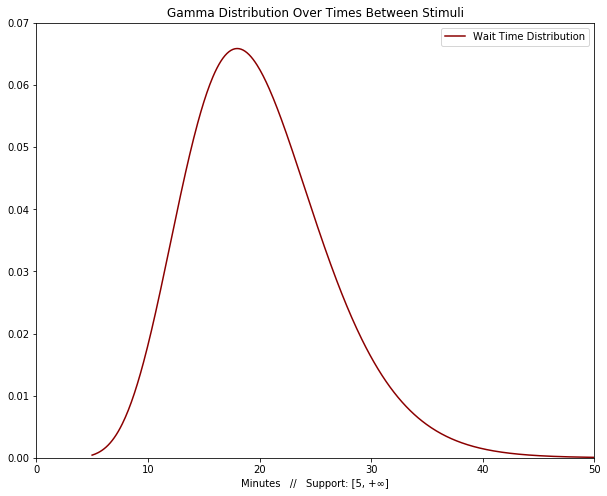

In [8]:
plt.figure(figsize=(10,8))
x = np.linspace(5, 50, 500)
y = wait_time_dist.pdf(x)
plt.plot(x, y, color='darkred', label="Wait Time Distribution")
plt.xlabel("Minutes   //   Support: [5, +∞]")
plt.legend()
plt.title("Gamma Distribution Over Times Between Stimuli")
plt.xlim(0,50)
plt.ylim(0,0.07)
plt.show()

In [9]:
test = sample_from_wait_times(wait_time_dist)
print(test)
test = absolute_timings(test)
print(test)

[975, 1427, 1399, 1263, 886, 804, 760, 945, 980, 1139, 643, 1116, 1322, 442, 885, 1329, 1412, 1183, 1164, 1901, 697, 1444, 1142, 1402, 1267, 1077, 937, 980, 1263, 1087, 760, 1449, 864]
[16, 40, 63, 84, 99, 112, 125, 140, 157, 176, 187, 205, 227, 235, 249, 271, 295, 315, 334, 366, 377, 401, 420, 444, 465, 483, 499, 515, 536, 554, 567, 591, 605]


In [10]:
def test_overlap(file_names, sample_times, 
                  rec_list = None):
    '''
    This tests the overlap between sample times created from the input
    distribution and all clean recording instances of all recording labels
    in file_names.
    Returns an array of shape (channels, # of recordings), where each position
    is the count of successful stimulations for that channel, that recording.
    '''
    if not rec_list:
        rec_list = ['rec1', 'rec2', 'rec3', 'rec4', 'rec5', 'rec6', 'rec7',
                    'rec8', 'rec9', 'rec10']
        
    overlap = np.zeros(( 8, len(rec_list) ))
    
    for r, rec in enumerate(rec_list):
        rec_labels = np.load(file_names[r])

        for c in range(8):
            count = 0
            for t in sample_times:
                if t < np.shape(rec_labels)[0]:
                    if rec_labels[t, c] == 1:
                        count += 1
            overlap[c, r] = count

    return overlap

Here's an example of the number of successful stimulations in total, summed by recording and channel.

In [11]:
time_sample = sample_from_wait_times(wait_time_dist)
time_sample = absolute_timings(time_sample)

overlap = test_overlap(label_file_names, test)
overlap_by_rec = np.sum(overlap, axis=0)
overlap_by_chan = np.sum(overlap, axis=1)

print (overlap)
print ("For each recording: ", overlap_by_rec)
print ("For each channel: ", overlap_by_chan)

[[ 7. 15.  7. 16.  7. 14. 12.  1.  1.  9.]
 [12.  5. 12. 14.  9. 10. 11.  2.  6. 13.]
 [19. 21.  5. 16. 21. 20.  8.  3. 20. 11.]
 [16. 18. 13. 15. 11. 19. 10.  4. 21.  8.]
 [ 9. 14.  7.  9. 16. 13.  8.  0.  1.  8.]
 [13.  1.  8.  4.  9. 10. 11.  0.  5. 12.]
 [17. 17. 12. 12. 15. 19. 16.  3. 18. 11.]
 [ 6.  5.  6.  1.  6.  5.  6.  0.  0.  0.]]
For each recording:  [ 99.  96.  70.  87.  94. 110.  82.  13.  72.  72.]
For each channel:  [ 89.  94. 144. 135.  85.  73. 140.  35.]


Let's generate a distribution of expected successful stimulations from different waittime samples:

In [12]:
successes = []
successes_2 = []
    
for _ in range(1000):

    #generate a sample of times
    time_sample = sample_from_wait_times(wait_time_dist)
    time_sample = absolute_timings(time_sample)
    
    time_sample_2 = sample_from_wait_times(wait_time_dist_2)
    time_sample_2 = absolute_timings(time_sample_2)

    #get overlap by recording
    overlap = test_overlap(label_file_names, time_sample)
    overlap_by_rec = np.sum(overlap, axis=0)
    
    overlap_2 = test_overlap(label_file_names, time_sample_2)
    overlap_by_rec_2 = np.sum(overlap_2, axis=0)
        
    #add the entries as samples for the histogram
    successes.append(overlap_by_rec.ravel())
    successes_2.append(overlap_by_rec_2.ravel())

successes = [item for sublist in successes for item in sublist]
successes_2 = [item for sublist in successes_2 for item in sublist]


(10000,)


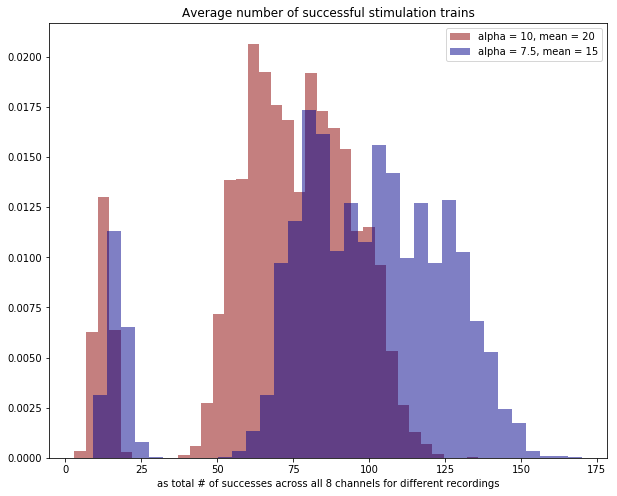

In [13]:
print(np.shape(successes))

plt.figure(figsize = (10,8))
plt.hist(successes, bins=35, color='darkred', density=True, alpha=0.5, label='alpha = 10, mean = 20')
plt.hist(successes_2, bins=35, color='darkblue', density=True, alpha=0.5, label='alpha = 7.5, mean = 15')
plt.title("Average number of successful stimulation trains")
plt.xlabel("as total # of successes across all 8 channels for different recordings")
plt.legend()
plt.show()

If we don't end up with a terrible recording like on the left here, this should give us enough useful trials.

## Debugging the Auditory Stimulation Setup

### First Trial
I'll start by visualizing the data from the 'MMH_rec04_031019.h5' file that I have imported above. I will first visualize half an hour of the data as is. 

Initiating a data copy.
Initiating a data copy.
        Maybe grab a cup of coffee in the meantime. :)


<Figure size 432x288 with 0 Axes>

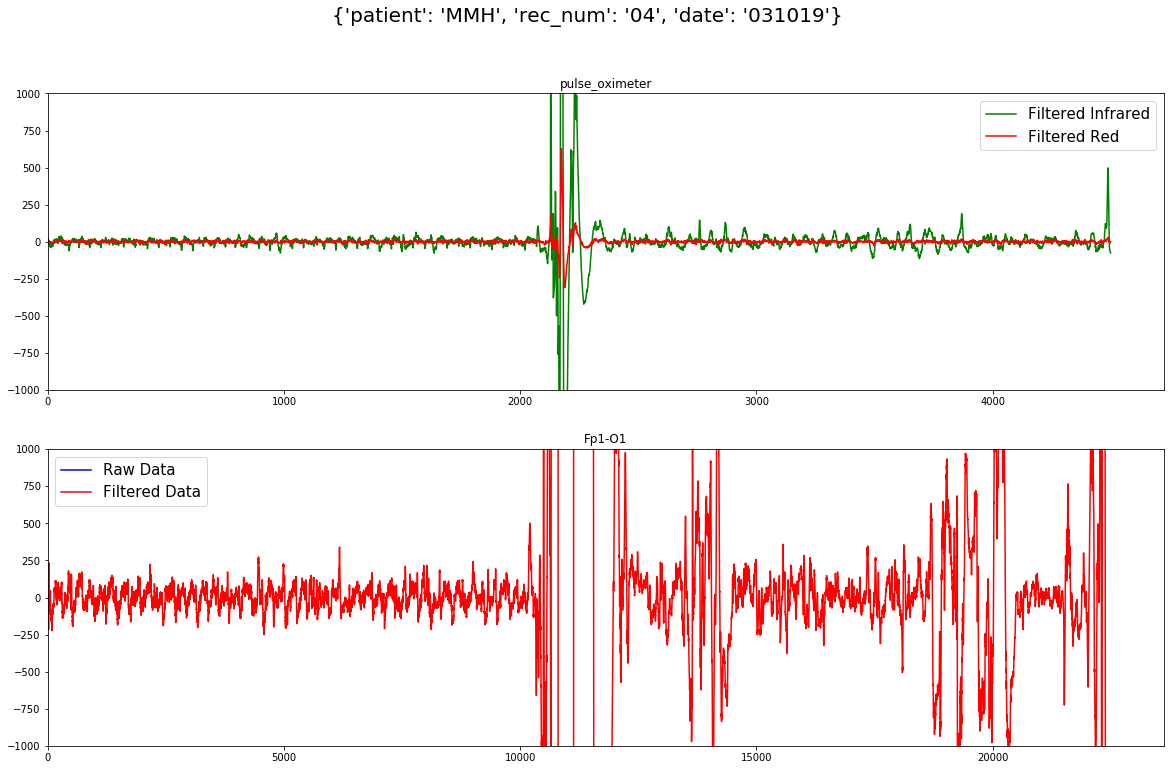

In [3]:
EEG_trial.cut_raw(indices=(75000,97500), rec_list=['rec4'], reset_data_copy=True)

EEG_trial.plot_raw_data(rec_list=['rec4'], channels=['pulse_oximeter', 'Fp1-O1'],
                        y_lim = (-1000,1000))

There's something strange going on with the amount of light impulses here and I want to replot the figure with seconds on the x-axis to see what the issue is.

Initiating a data copy.
        Maybe grab a cup of coffee in the meantime. :)


<Figure size 432x288 with 0 Axes>

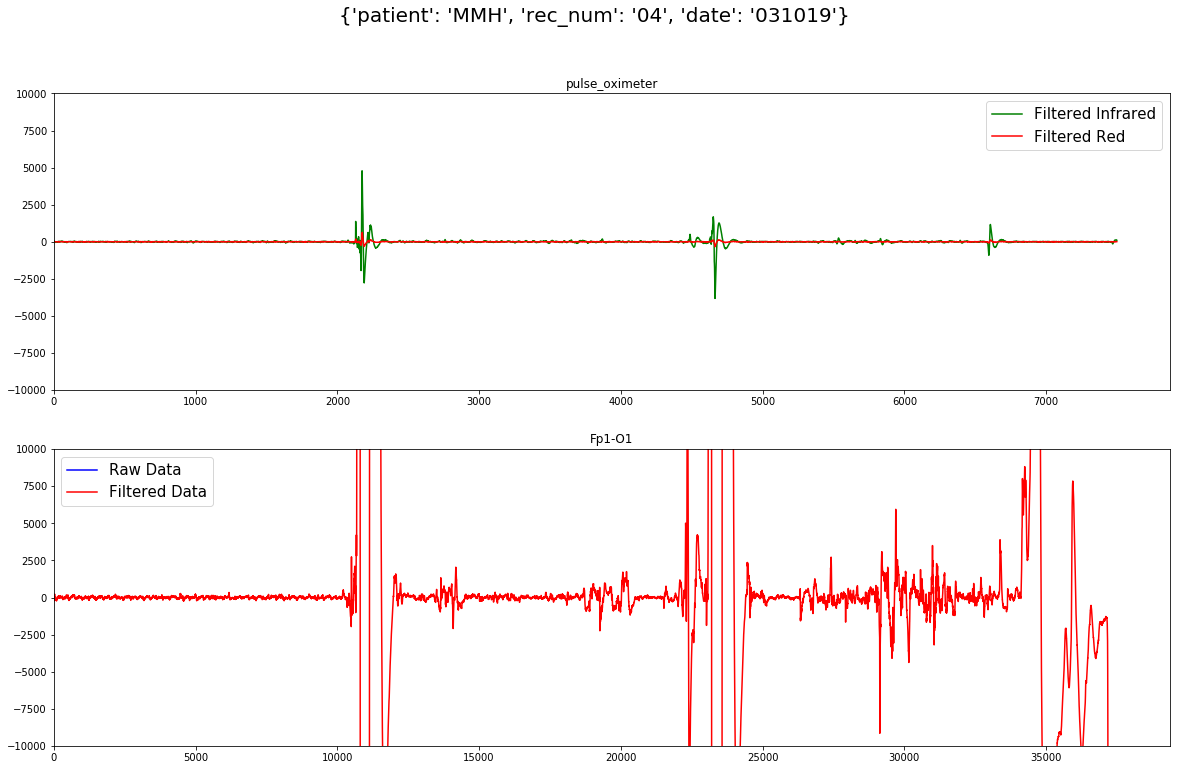

In [4]:
EEG_trial.cut_raw(indices=(75000,112500), rec_list=['rec4'], reset_data_copy=True)

EEG_trial.plot_raw_data(rec_list=['rec4'], channels=['pulse_oximeter', 'Fp1-O1'])

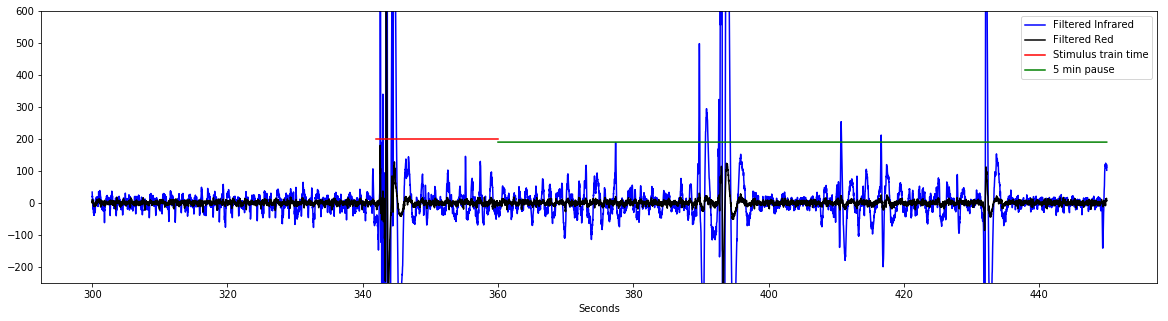

In [5]:
# converting 15000:22500 to seconds
time = np.linspace(300,450,7500)

plt.figure(figsize=(20,5))
plt.plot(time, EEG_trial.data_copy['rec4']['pulse_oximeter']['infrared_filtered'], color='b', label='Filtered Infrared')
plt.plot(time, EEG_trial.data_copy['rec4']['pulse_oximeter']['red_filtered'], color='k', label='Filtered Red')
plt.xlabel('Seconds')
plt.plot(np.linspace(342, 360, 900), np.repeat(200, 900), color='red', label="Stimulus train time")
plt.plot(np.linspace(360, 450, 4500), np.repeat(190, 4500), color='green', label="5 min pause")
plt.ylim(-250,600)
plt.legend()
plt.show()

#stimulus trains should be ~17seconds long.

Initiating a data copy.
        Maybe grab a cup of coffee in the meantime. :)


<Figure size 432x288 with 0 Axes>

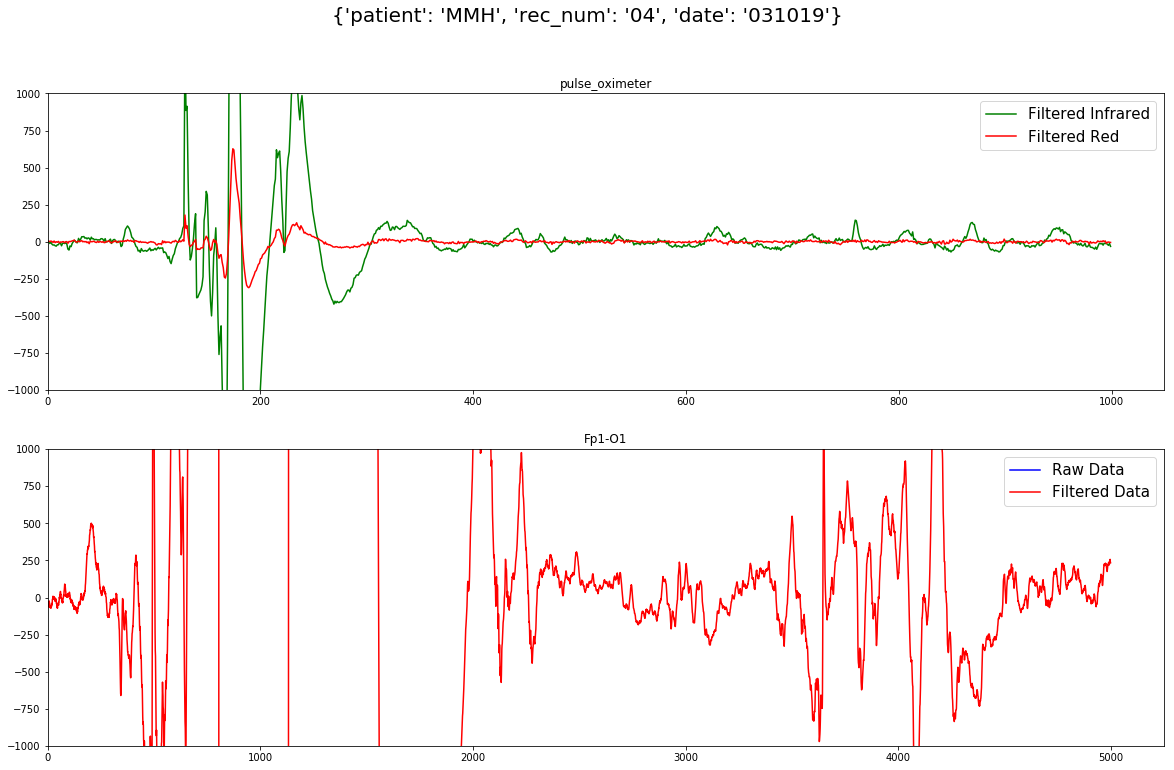

In [6]:
EEG_trial.cut_raw(indices=(85000,90000), rec_list=['rec4'], reset_data_copy=True)

EEG_trial.plot_raw_data(rec_list=['rec4'], channels=['pulse_oximeter', 'Fp1-O1'],
                        y_lim = (-1000,1000))

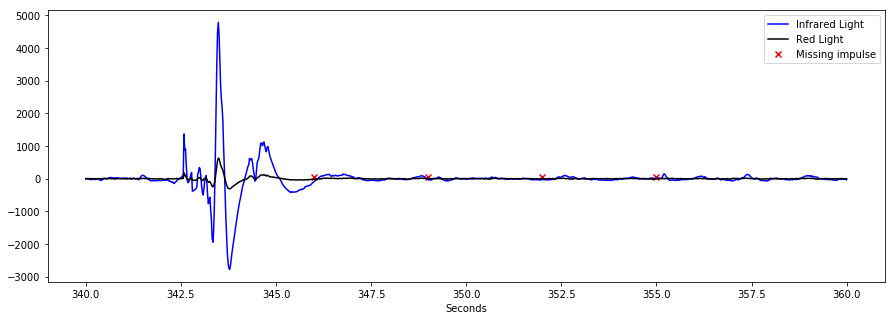

In [7]:
# converting 15000:22500 to seconds
time = np.linspace(340,360,1000)

plt.figure(figsize=(15,5))
plt.plot(time, EEG_trial.data_copy['rec4']['pulse_oximeter']['infrared_filtered'], color='b', label='Infrared Light')
plt.plot(time, EEG_trial.data_copy['rec4']['pulse_oximeter']['red_filtered'], color='k', label='Red Light')
plt.xlabel('Seconds')
plt.scatter([346, 349, 352, 355], np.repeat(50, 4), color='red', marker='x', label="Missing impulse")
# plt.ylim(-200,200)
plt.legend()
plt.show()

### Data Visualization - Trial 2
Having realized that the LED setup was broken for the first trial, I have now fixed the setup and recorded another, slightly shorter session with the setup. Note that for this trial I have loaded the file 'MMH_rec05_131019.h5'.

Initiating a data copy.
        Maybe grab a cup of coffee in the meantime. :)


<Figure size 432x288 with 0 Axes>

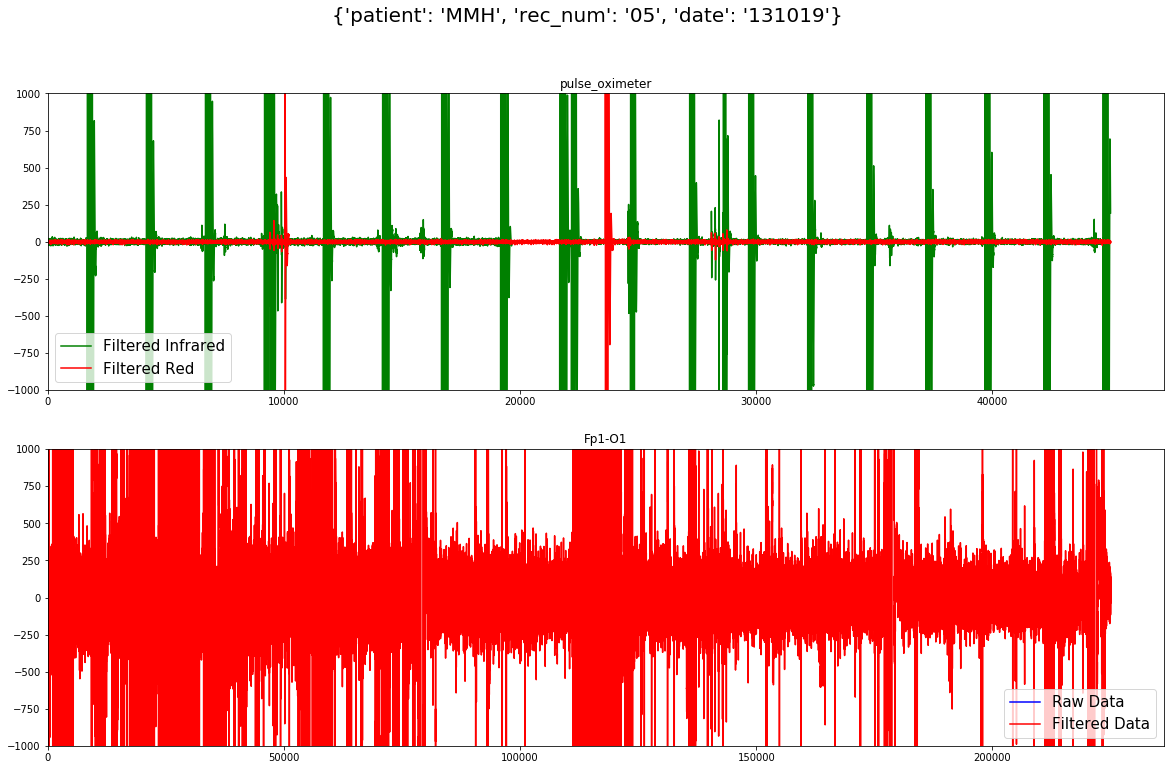

In [8]:
EEG_trial.cut_raw(indices=(750000,975000), rec_list=['rec5'], reset_data_copy=True)

EEG_trial.plot_raw_data(rec_list=['rec5'], channels=['pulse_oximeter', 'Fp1-O1'],
                        y_lim = (-1000,1000))

Initiating a data copy.
        Maybe grab a cup of coffee in the meantime. :)


<Figure size 432x288 with 0 Axes>

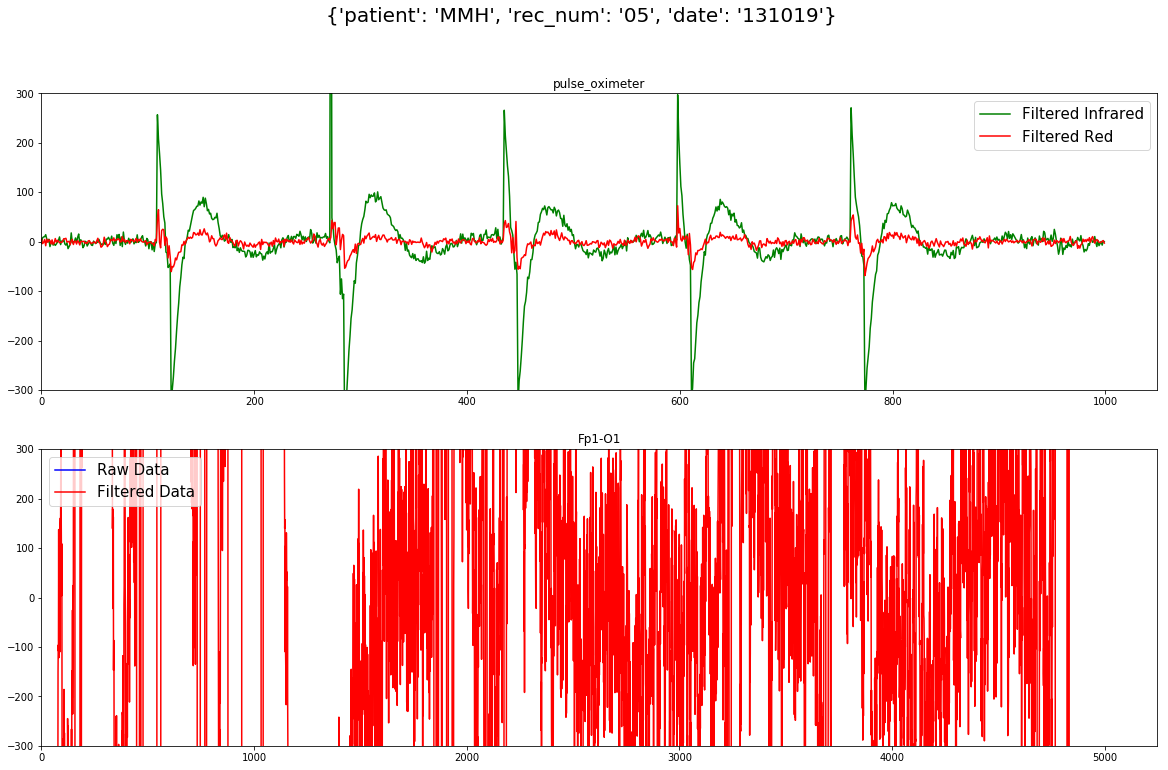

In [9]:
EEG_trial.cut_raw(indices=(259000,264000), rec_list=['rec5'], reset_data_copy=True)

EEG_trial.plot_raw_data(rec_list=['rec5'], channels=['pulse_oximeter', 'Fp1-O1'],
                        y_lim = (-300,300))

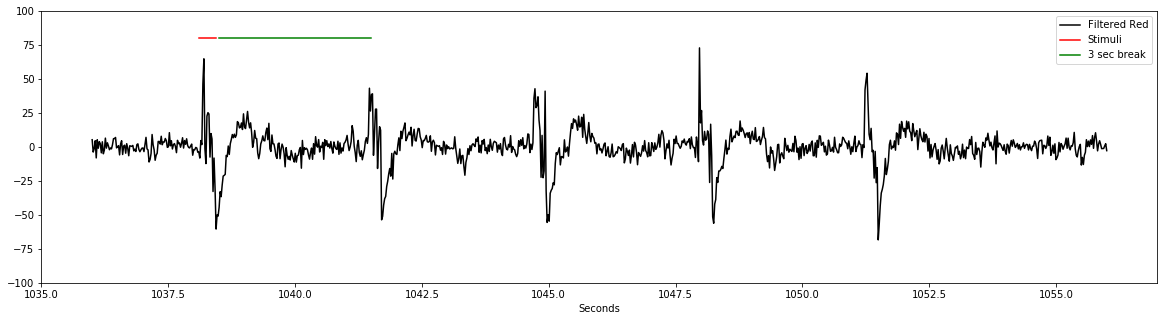

In [11]:
# 51800:52800 in seconds:
time = np.linspace(1036,1056,1000)

plt.figure(figsize=(20,5))
# plt.plot(time, EEG_trial.data_copy['rec5']['pulse_oximeter']['infrared_filtered'], color='b', label='Filtered Infrared')
plt.plot(time, EEG_trial.data_copy['rec5']['pulse_oximeter']['red_filtered'], color='k', label='Filtered Red')
plt.xlabel('Seconds')
plt.plot(np.linspace(1038.1, 1038.45, 100), np.repeat(80, 100), color='red', label="Stimuli")
plt.plot(np.linspace(1038.5, 1041.5, 100), np.repeat(80, 100), color='green', label="3 sec break")
plt.ylim(-100,100)
plt.legend()
plt.show()

**"What does it look like, when there's no stimuli?"**

Initiating a data copy.
        Maybe grab a cup of coffee in the meantime. :)


<Figure size 432x288 with 0 Axes>

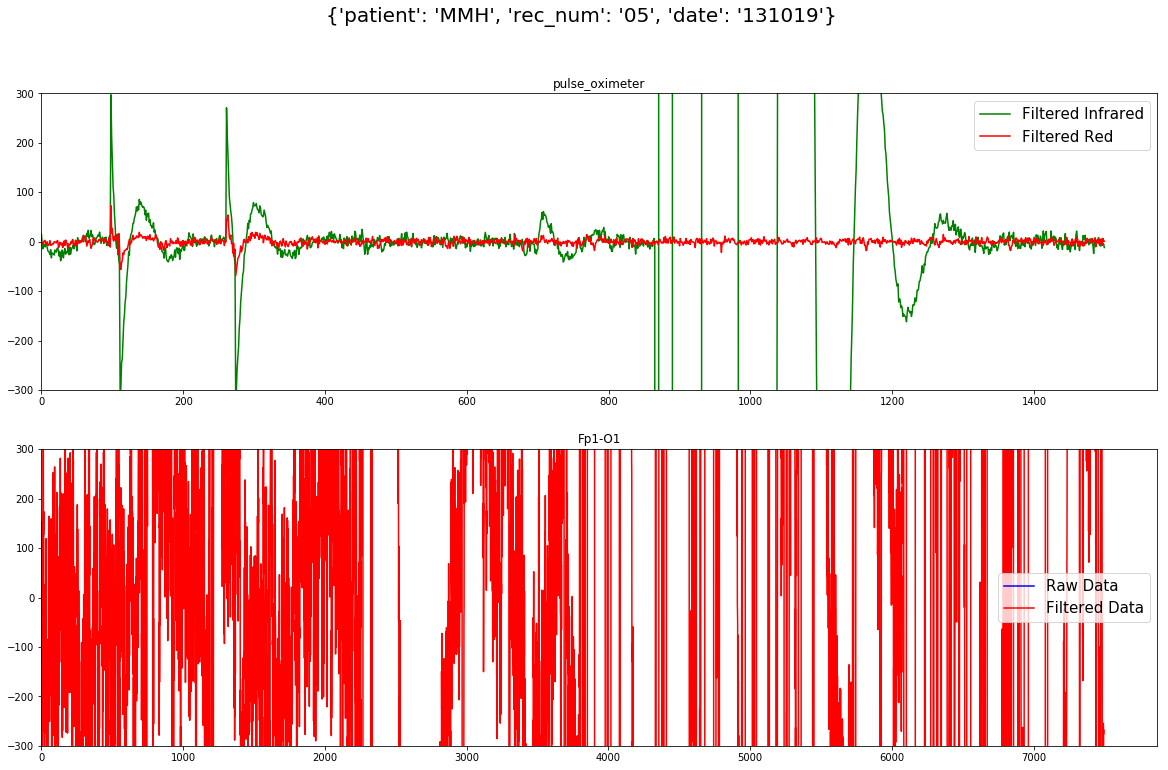

In [12]:
EEG_trial.cut_raw(indices=(261500,269000), rec_list=['rec5'], reset_data_copy=True)

EEG_trial.plot_raw_data(rec_list=['rec5'], channels=['pulse_oximeter', 'Fp1-O1'],
                        y_lim = (-300,300))

**How many stimuli trains do you have?**

The below produces a  really long plot of the raw data that can be downloaded and zoomed in on to see the individual stimuli trains and count them. 

In [14]:
EEG_trial.work_on_copy = False
EEG_trial.generate_copy()

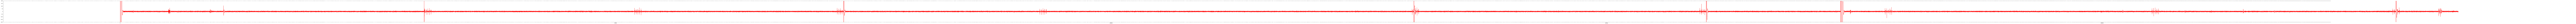

In [15]:
plt.figure(figsize=(600,5))
plt.plot(EEG_trial.data_copy['rec5']['pulse_oximeter']['red_filtered'], color='red')
plt.ylim(-200,200)
plt.show()

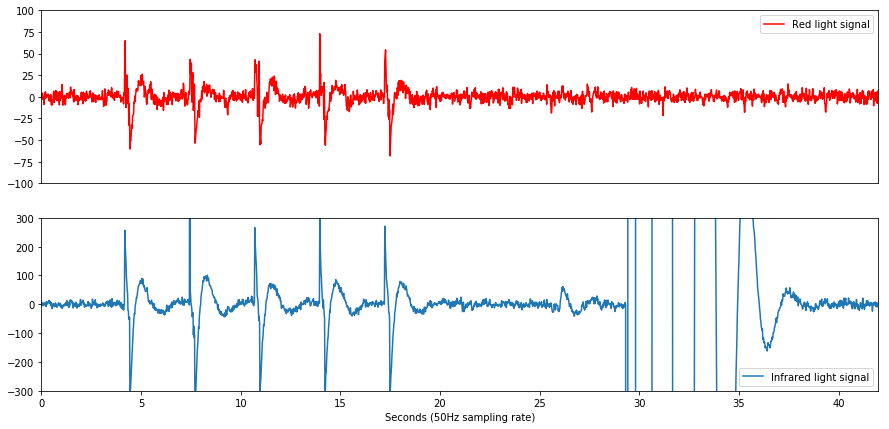

In [16]:
x = np.linspace(0, 42, 2100)

plt.figure(figsize=(15,7))
plt.subplot(211)
plt.plot(x, EEG_trial.data_copy['rec5']['pulse_oximeter']['red_filtered'][51700:53800],color='red', label="Red light signal")
plt.ylim(-100,100)
plt.xlim(0,42)
plt.xticks([])
plt.legend()

plt.subplot(212)
plt.plot(x, EEG_trial.data_copy['rec5']['pulse_oximeter']['infrared_filtered'][51700:53800], label="Infrared light signal")
plt.xlabel('Seconds (50Hz sampling rate)')
plt.ylim(-300,300)
plt.xlim(0,42)


plt.legend()
plt.show()

**What's with the noise in the Infrared signal?**

(about the pulses on the infrared signal) These pulses are 5 seconds long every 50 seconds. Do you see that in every recording? Do you also see that if the headset is not on your head?
> To answer the first question, I'll plot the infrared signal of two previous recordings, one I did with the LEDs on, one without.
For the second one, I'll look at data from the previous recordings after the patients took off the headset.

In [18]:
EEG = EEGProcessing()

files = ['LEK_rec01_221018.h5',          #original data
         'MMH_rec03_120619.h5',          #first pulse oximeter trial
         'MMH_rec04_031019.h5',          #first auditory stimulation trial, no real signal b/c LED was broken
         'MMH_rec05_131019.h5', 'MMH_rec06_161019.h5']   #auditory stimulation trials    
EEG.import_data(files)

In [19]:
EEG.work_on_copy = False
EEG.generate_copy()

        Maybe grab a cup of coffee in the meantime. :)


<Figure size 432x288 with 0 Axes>

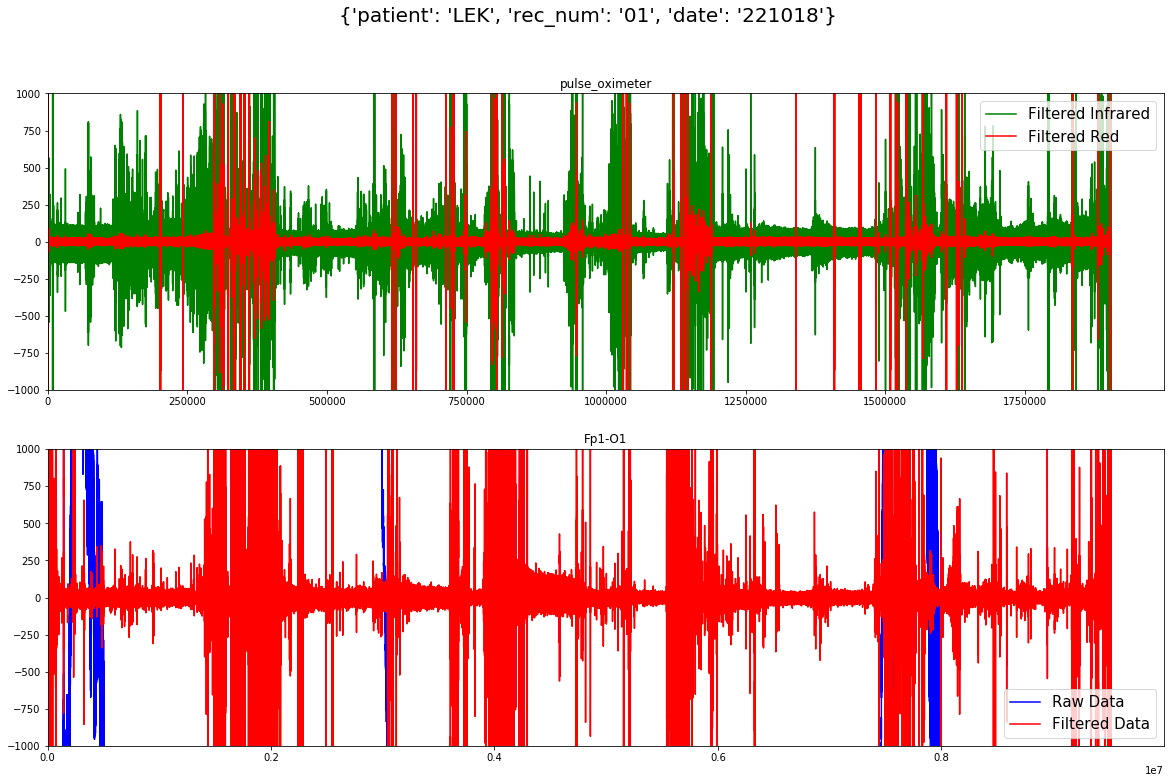

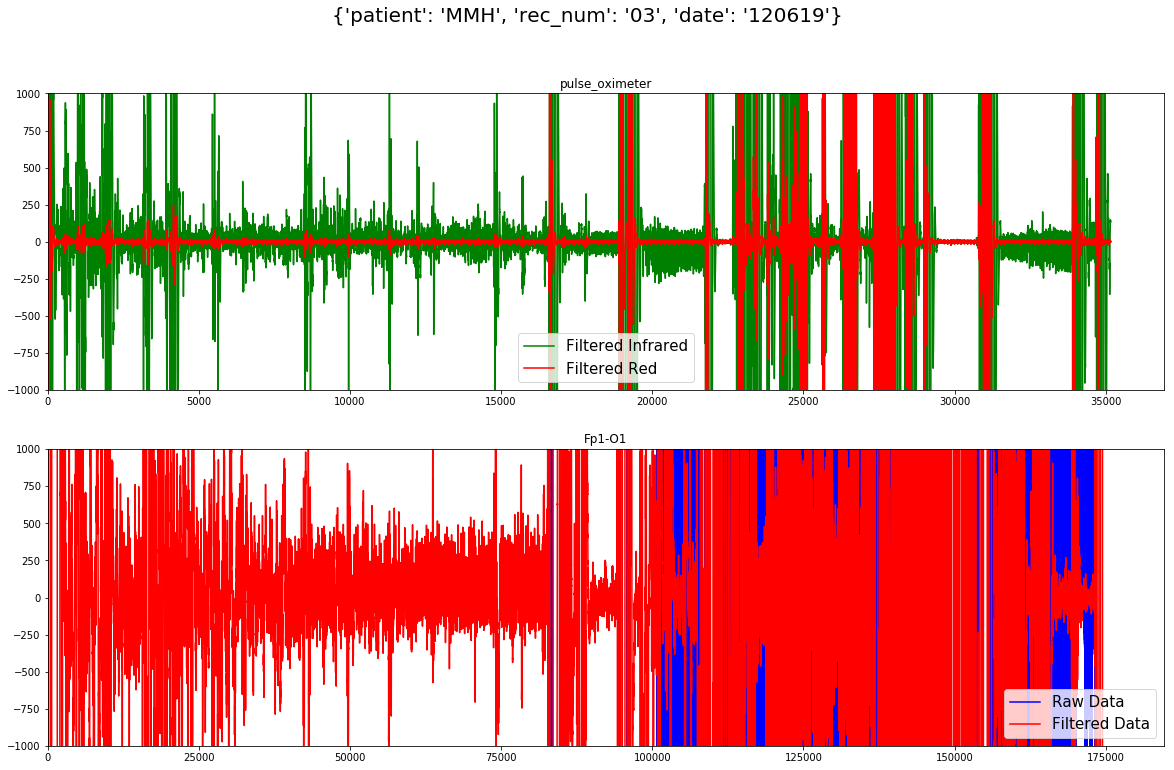

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 1440x864 with 2 Axes>

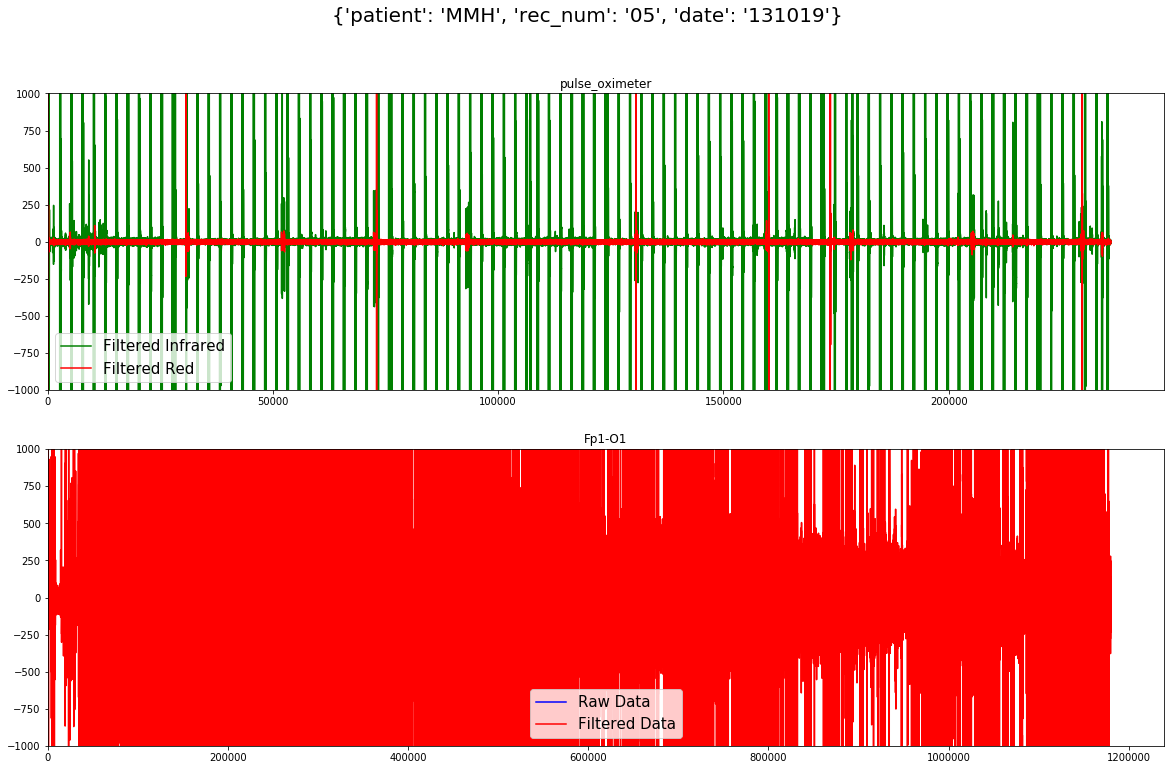

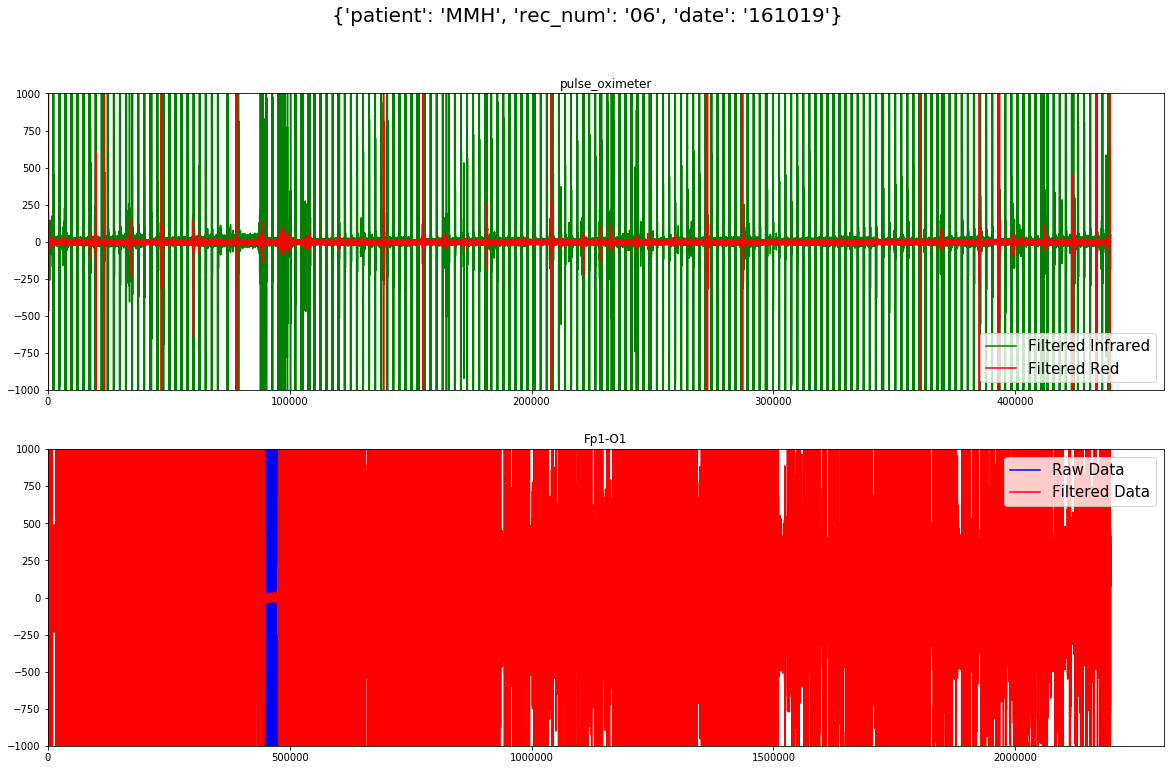

In [20]:
EEG.plot_raw_data(rec_list=None, channels=['pulse_oximeter', 'Fp1-O1'], y_lim=(-1000, 1000))

In [21]:
# %matplotlib qt #this pops out the graph in a separate window
EEG.plot_raw_data(rec_list=['rec3'], channels=['pulse_oximeter', 'Fp1-O1'], y_lim=(-100, 100))

        Maybe grab a cup of coffee in the meantime. :)


<Figure size 432x288 with 0 Axes>

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 1440x864 with 2 Axes>

### Validating Moritz' findings

He shared that analyzing the 7th MMH recording, he found a clear alpha peak in one of the channels on the spectra plot and the time-frequency plots reflect that information.

In [22]:
EEG_validation = EEGProcessing()

files = ['LEK_rec01_221018.h5',  #original data
         'MMH_rec07_231019.h5']  #auditory stimulation trial lying still   
EEG_validation.import_data(files)

In [26]:
print(len(EEG_validation.data_copy['rec2']['O1-O2']['raw']))

416621


In [27]:
#Discarding the first 6 minutes of the recording since they are noisy.
EEG_validation.cut_raw(indices=(90000,416621), rec_list=['rec2'], reset_data_copy=True)

Initiating a data copy.


<Figure size 432x288 with 0 Axes>

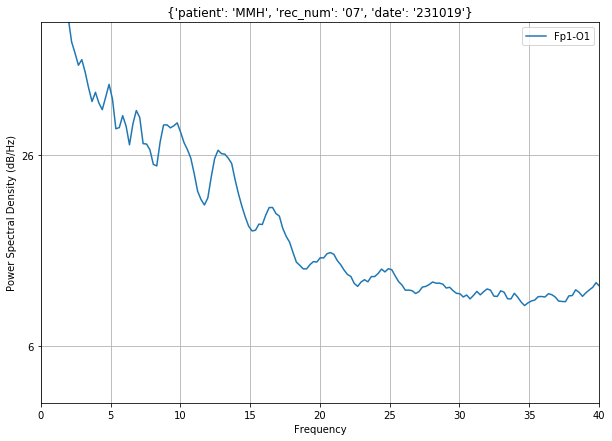

<Figure size 432x288 with 0 Axes>

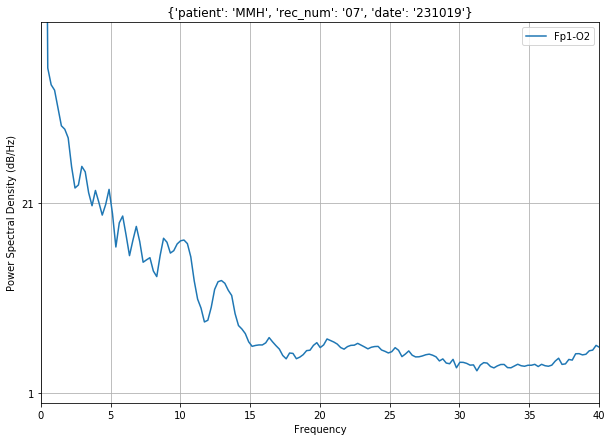

<Figure size 432x288 with 0 Axes>

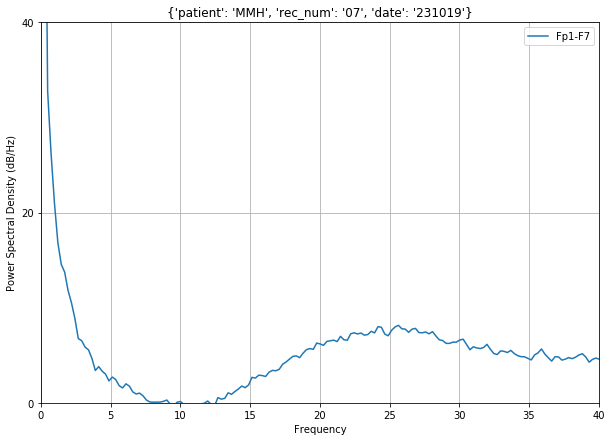

<Figure size 432x288 with 0 Axes>

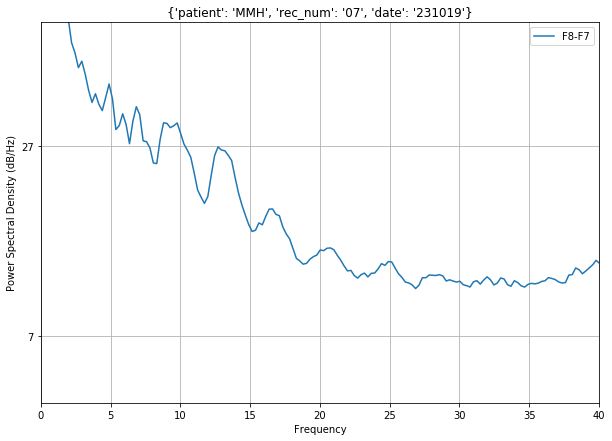

<Figure size 432x288 with 0 Axes>

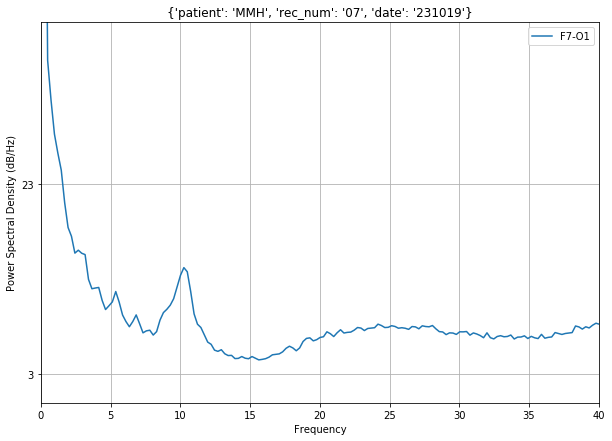

<Figure size 432x288 with 0 Axes>

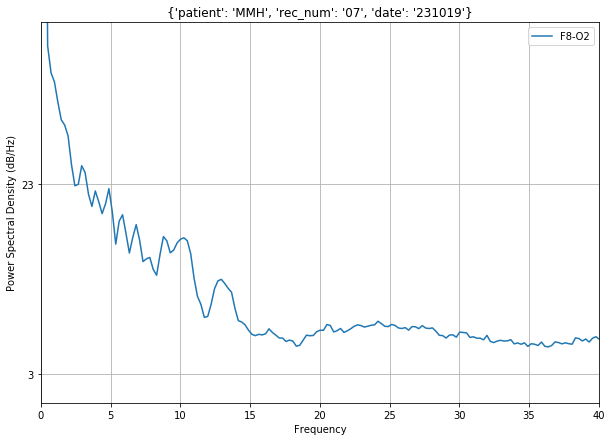

<Figure size 432x288 with 0 Axes>

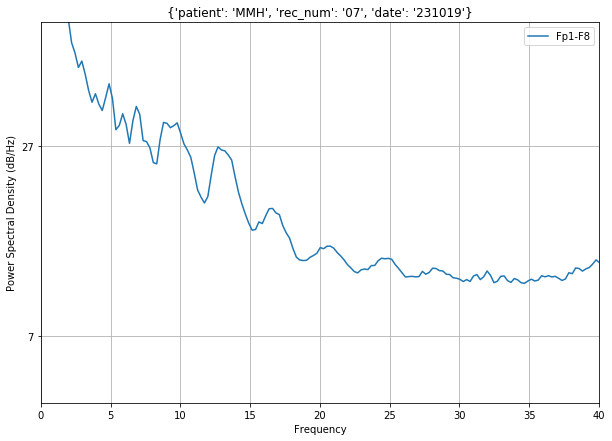

<Figure size 432x288 with 0 Axes>

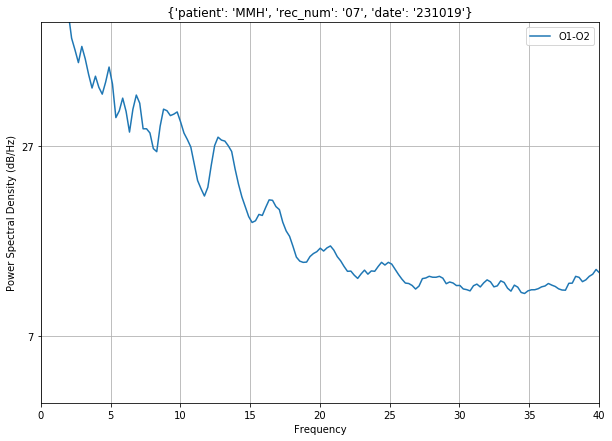

In [33]:
for cha in EEG_validation.channels:
    EEG_validation.plot_power_spectrum(rec_list = ['rec2'],
                        channels = [cha],
                        x_lims = (0,40), y_lims=(0,40))

<Figure size 432x288 with 0 Axes>

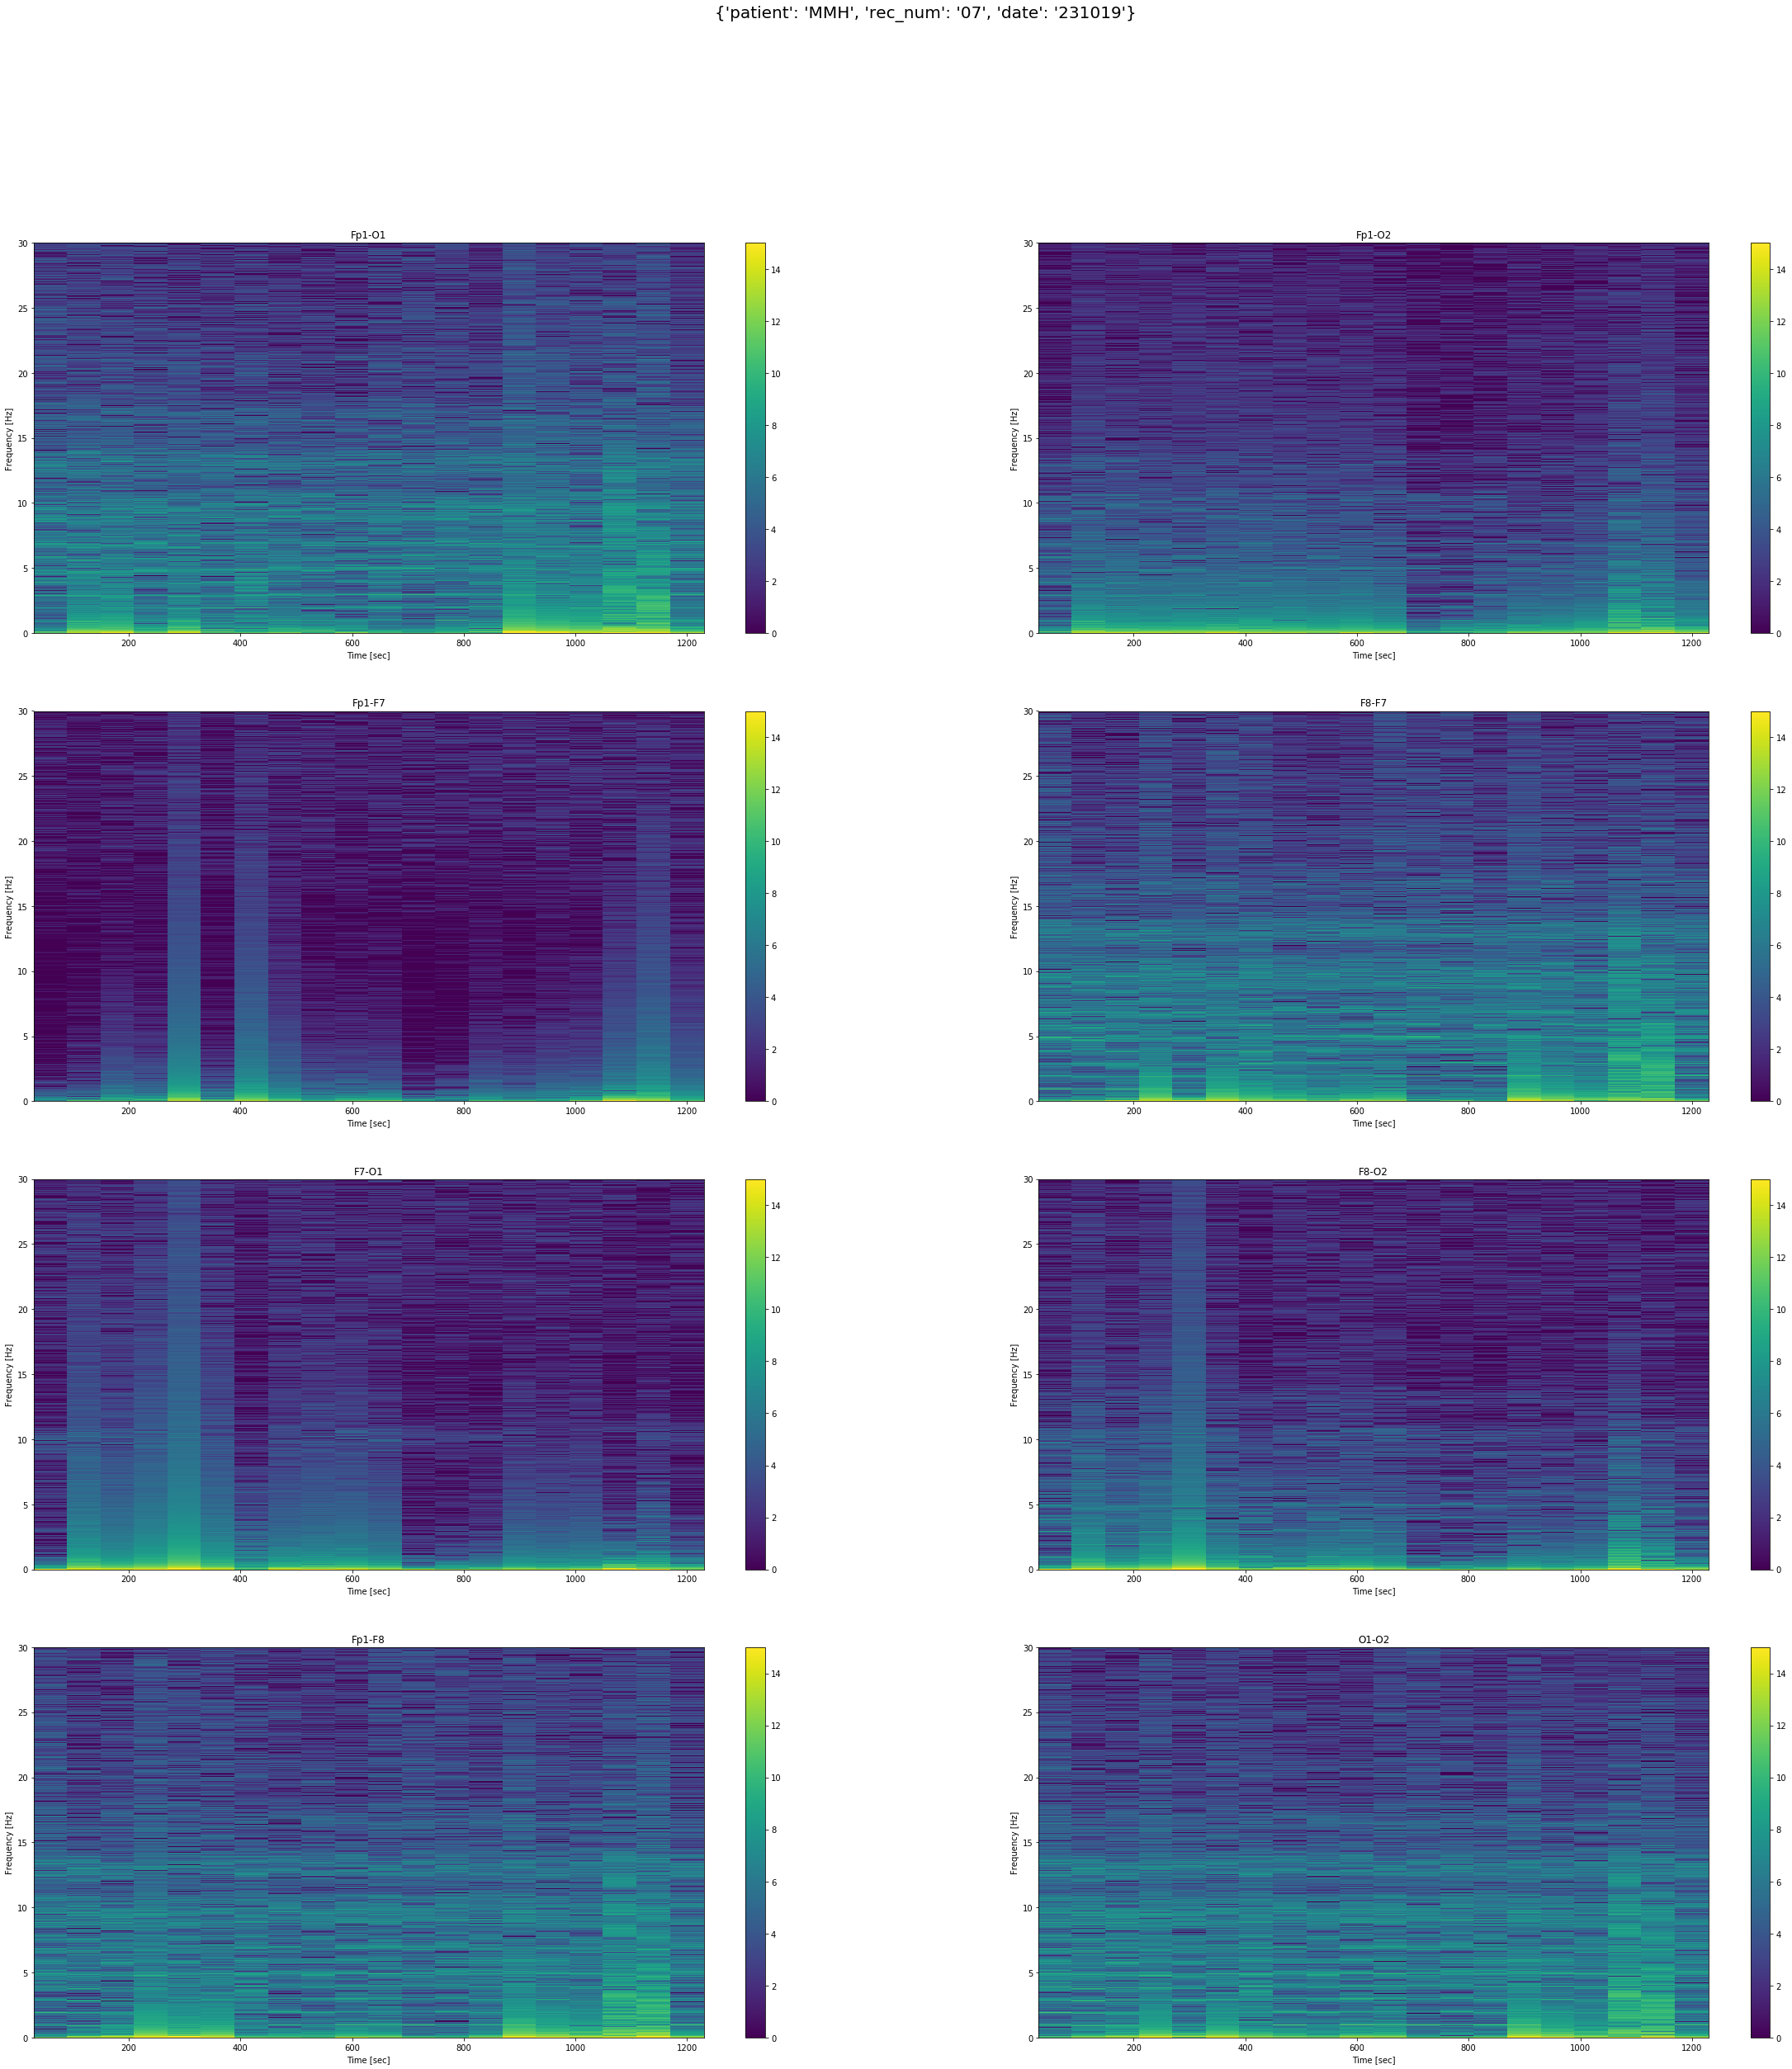

In [34]:
EEG_validation.plot_spectrogram(sec_per_window = 60, frequencies = (0, 30),
            rec_list = ['rec2'], channels = None, fig_size = (20,10))

        Maybe grab a cup of coffee in the meantime. :)


<Figure size 432x288 with 0 Axes>

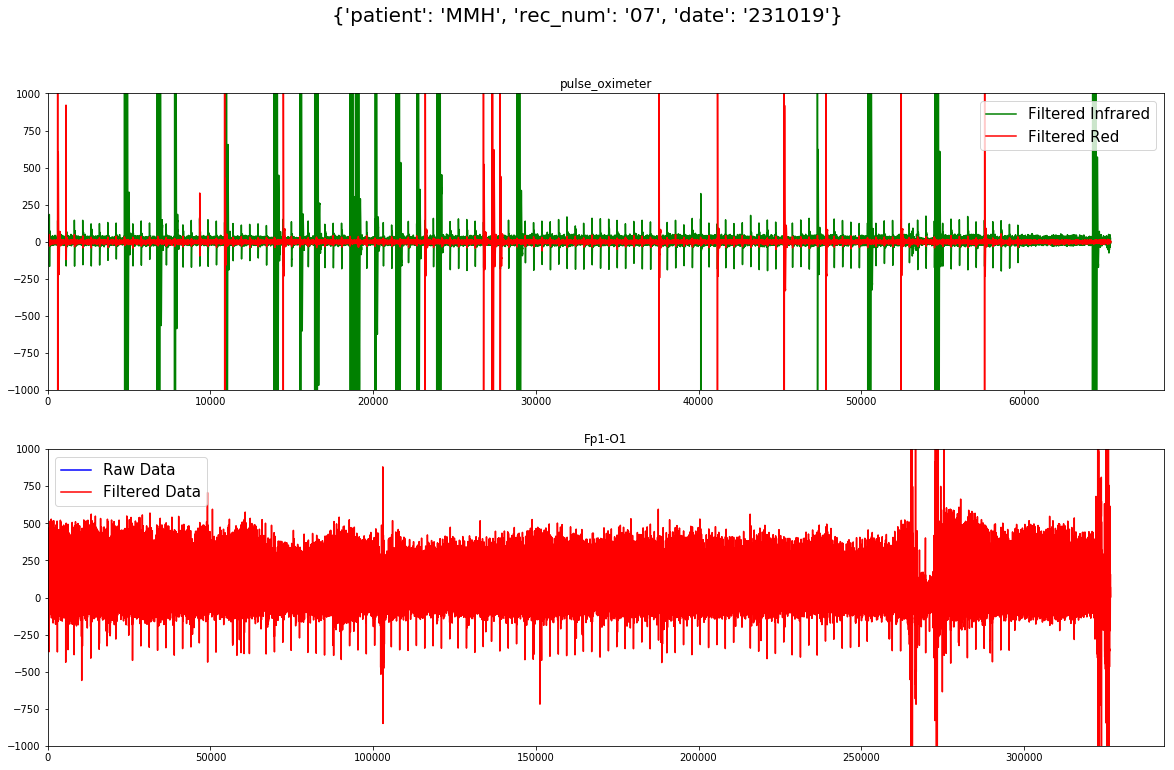

In [35]:
EEG_validation.plot_raw_data(rec_list=['rec2'], channels=['pulse_oximeter', 'Fp1-O1'], y_lim=(-1000, 1000))


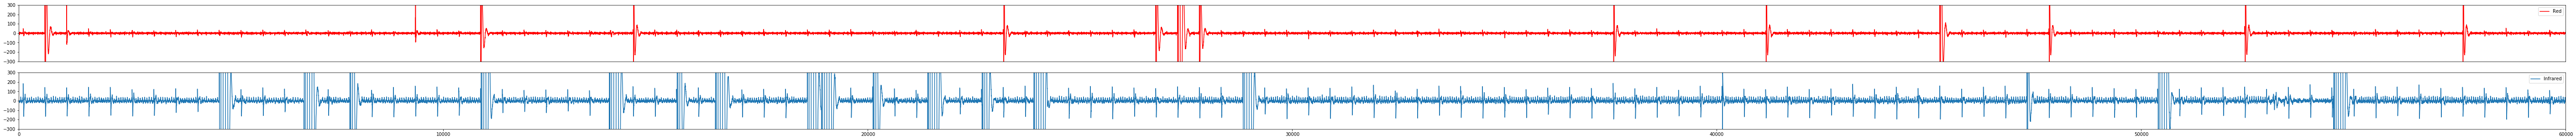

In [36]:
plt.figure(figsize=(100,5))
plt.subplot(211)
plt.plot(EEG_validation.data_copy['rec2']['pulse_oximeter']['red_filtered'],color='red', label="Red")
plt.ylim(-300,300)
plt.xlim(0,60000)
plt.xticks([])
plt.legend()

plt.subplot(212)
plt.plot(EEG_validation.data_copy['rec2']['pulse_oximeter']['infrared_filtered'], label="Infrared")
plt.ylim(-300,300)
plt.xlim(0,60000)


plt.legend()
plt.show()